In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline

In [3]:
import pandas as pd

In [4]:
input_data = pd.read_excel('Target_Customer_Prediction.xlsx')

In [5]:
input_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Offer_acceptance
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,1


In [6]:
input_data.shape

(5000, 12)

In [7]:
x = input_data.drop(['Offer_acceptance'], axis=1)
y = input_data['Offer_acceptance']

In [8]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3 )

In [10]:
from sklearn import tree 
ctree = tree.DecisionTreeClassifier()
ctree.fit(x_train, y_train)
y_pred = ctree.predict(x_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.816


In [ ]:
comp_df = pd.DataFrame()
comp_df['Class_actual'] = y_test
comp_df['Class_predicted'] = y_pred
comp_df.head(5)

In [ ]:
y_test.value_counts(normalize=True)

In [ ]:
ctree.feature_importances_

In [ ]:
temp_imp = pd.DataFrame()
temp_imp['col'] = x.columns
temp_imp['imp'] = ctree.feature_importances_*100

temp_imp

In [ ]:
temp_imp.sort_values('imp', ascending=False)

#### Model Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [2, 3, 4, 5, 6, 7 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_split"  : [3, 5, 10 ],
               "max_depth"          : [2,3,4,5] ,
               "class_weight"      : [{0:1, 1:2}, {0:1, 1:5}]
               }



In [ ]:
ctree_model = tree.DecisionTreeClassifier()

In [ ]:
#optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'accuracy', cv = 5, verbose=3)
optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'recall', cv = 5, verbose=3)

In [ ]:
optimized_tree.fit(x_train, y_train)

In [ ]:
optimized_tree.best_params_

In [ ]:
optimized_tree.best_estimator_

In [ ]:
optimized_tree.best_score_

In [ ]:
#optimized_tree.cv_results_

In [ ]:
ctree_final = optimized_tree.best_estimator_

y_pred = ctree_final.predict(x_test)
metrics.accuracy_score(y_test, y_pred) 

In [ ]:
y_pred_prob = ctree_final.predict_proba(x_test)
cust_likelihood = y_pred_prob[ :,  1]*100
cust_likelihood

In [ ]:
comp_df = x_test.copy()
comp_df['actual'] = y_test
comp_df['predicted'] = y_pred
comp_df['propensity'] = cust_likelihood
 
comp_df.head()

In [ ]:
metrics.recall_score(y_test, y_pred)

In [ ]:
metrics.precision_score(y_test, y_pred)

In [ ]:
y_test.value_counts()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
metrics.recall_score(y_test, y_pred)

In [ ]:
metrics.precision_score(y_test, y_pred)

#### Model Predicted Probability

In [164]:
x_test.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
246,38,14,60,2,0.6,3,0,0,0,1,1
2159,61,35,99,1,4.8,3,255,0,0,0,1
29,38,13,119,1,3.3,2,0,0,1,1,1
1647,35,5,68,4,1.8,3,0,0,0,0,0
4786,36,12,18,4,1.0,1,0,0,0,1,1


In [163]:
y_pred_prob = ctree_final.predict_proba(x_test)
y_pred_prob

array([[0.92676431, 0.07323569],
       [0.44230769, 0.55769231],
       [0.        , 1.        ],
       ...,
       [0.8960452 , 0.1039548 ],
       [0.92676431, 0.07323569],
       [0.8125    , 0.1875    ]])

In [165]:
from sklearn.model_selection import GridSearchCV
param_grid = { "criterion"      : ['gini', 'entropy'],    
               "max_features"   : [2, 3, 4, 5, 6, 7 ],             
               "splitter"       : ['best', 'random'],  
               "min_samples_split"  : [3, 5, 10 ],
               "max_depth"          : [2,3,4,5] 
#               "class_weight"      : [{0:1, 1:2}, {0:1, 1:5}]
               }
ctree_model = tree.DecisionTreeClassifier()
optimized_tree = GridSearchCV(ctree_model, param_grid, scoring = 'accuracy', cv=5) 
optimized_tree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': [2, 3, 4, 5, 6, 7], 'splitter': ['best', 'random'], 'min_samples_split': [3, 5, 10], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [166]:
ctree_final = optimized_tree.best_estimator_
y_pred = ctree_final.predict(x_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred) )
print('Sensitivity :', metrics.recall_score(y_test, y_pred))
print('Precision :', metrics.precision_score(y_test, y_pred))

Accuracy : 0.894
Sensitivity : 0.4774436090225564
Precision : 0.8639455782312925


In [167]:
y_pred_prob = ctree_final.predict_proba(x_test)
y_pred_prob

array([[0.92807746, 0.07192254],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       ...,
       [0.89606577, 0.10393423],
       [0.92807746, 0.07192254],
       [0.90654206, 0.09345794]])

In [171]:
# prediction class based on default threshold prob = 0.5
df_prediction = x_test.copy()
df_prediction['actual_class'] = y_test
df_prediction['pred_class'] = y_pred
df_prediction['prob_1'] = y_pred_prob[:,1]
df_prediction.head(25)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,actual_class,pred_class,prob_1
246,38,14,60,2,0.6,3,0,0,0,1,1,0,0,0.071923
2159,61,35,99,1,4.8,3,255,0,0,0,1,1,1,0.750000
29,38,13,119,1,3.3,2,0,0,1,1,1,1,1,1.000000
1647,35,5,68,4,1.8,3,0,0,0,0,0,0,0,0.103934
4786,36,12,18,4,1.0,1,0,0,0,1,1,0,0,0.071923
4711,65,40,59,3,2.4,1,0,0,0,0,0,0,0,0.103934
3552,51,27,22,4,0.5,2,0,0,0,1,1,0,0,0.071923
4706,60,36,8,2,1.0,1,0,0,0,0,0,0,0,0.103934
851,41,16,23,2,1.4,2,0,1,0,1,0,1,0,0.103934
3436,56,29,42,4,2.5,2,0,0,0,0,0,0,0,0.103934


### ROC Curver and Area under Curve (AUC) : 


In [172]:
print(metrics.roc_auc_score(y_test, y_pred))

0.7306180767965295


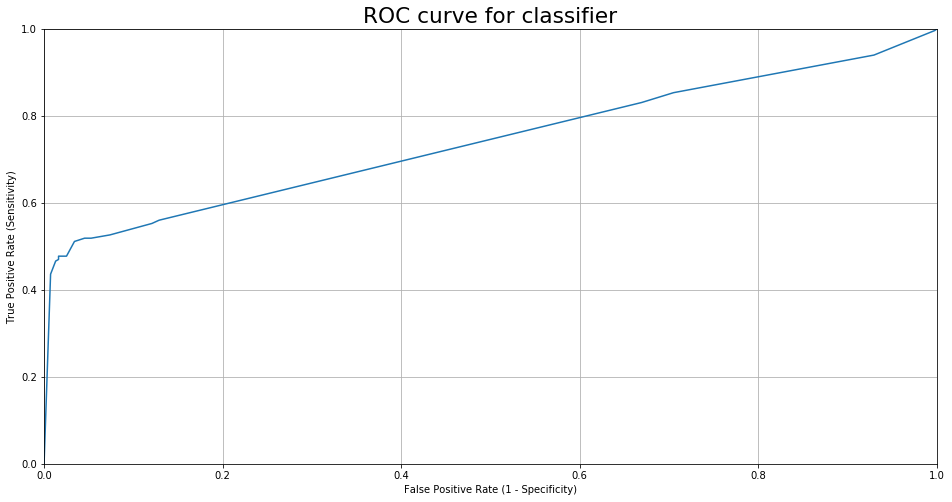

In [173]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 18
plt.title('ROC curve for classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- AUC is the percentage of the ROC plot that is underneath the curve:
- AUC is useful as a single number summary of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will   
   assign a higher predicted probability to the positive observation.

In [174]:
df_threshold = pd.DataFrame()
df_threshold['tpr'] = tpr
df_threshold['fpr'] = fpr
df_threshold['prob'] = thresholds  # probability(1)
df_threshold

,tpr,fpr,prob
0,0.000000,0.000000,2.000000
1,0.436090,0.007293,1.000000
2,0.466165,0.012966,0.750000
3,0.469925,0.016207,0.600000
4,0.477444,0.016207,0.571429
5,0.477444,0.021070,0.444444
6,0.477444,0.025122,0.416667
7,0.511278,0.034036,0.340426
8,0.518797,0.045381,0.260870
9,0.518797,0.052674,0.138889


In [182]:
# prediction class based on new threshold prob = 0.11
df_prediction.loc[df_prediction['prob_1'] >=.108, 'pred_class_new'] = '1'
df_prediction.loc[df_prediction['prob_1'] <.108, 'pred_class_new'] = '0'
df_prediction['pred_class_new'] = df_prediction['pred_class_new'].astype(int)
df_prediction.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,actual_class,pred_class,prob_1,pred_class_new
246,38,14,60,2,0.6,3,0,0,0,1,1,0,0,0.071923,0
2159,61,35,99,1,4.8,3,255,0,0,0,1,1,1,0.750000,1
29,38,13,119,1,3.3,2,0,0,1,1,1,1,1,1.000000,1
1647,35,5,68,4,1.8,3,0,0,0,0,0,0,0,0.103934,0
4786,36,12,18,4,1.0,1,0,0,0,1,1,0,0,0.071923,0
4711,65,40,59,3,2.4,1,0,0,0,0,0,0,0,0.103934,0
3552,51,27,22,4,0.5,2,0,0,0,1,1,0,0,0.071923,0
4706,60,36,8,2,1.0,1,0,0,0,0,0,0,0,0.103934,0
851,41,16,23,2,1.4,2,0,1,0,1,0,1,0,0.103934,0
3436,56,29,42,4,2.5,2,0,0,0,0,0,0,0,0.103934,0


In [183]:
# accuracy at threshold=.13
print( 'accuracy = ' , metrics.accuracy_score(df_prediction.actual_class, df_prediction.pred_class_new))
print( 'sensitivity(tpr) = ' , metrics.recall_score(df_prediction.actual_class, df_prediction.pred_class_new))
print( 'precision = ' , metrics.precision_score(df_prediction.actual_class, df_prediction.pred_class_new))

accuracy =  0.816
sensitivity(tpr) =  0.5601503759398496
precision =  0.4837662337662338


#### Model Variance 

In [ ]:
ctree_final.fit(x_train, y_train)
#
y_pred = ctree_final.predict(x_test)
metrics.accuracy_score(y_test, y_pred) 

In [160]:
import numpy as np

k = 50
perf = []
models = []


for i in range(k):
    models.append(ctree_final.fit(x_train, y_train))
    y_pred = ctree_final.predict(x_test)
    perf.append(metrics.accuracy_score(y_test, y_pred))
    
perf = np.array(perf)
print(perf)
print('Avg Performance :', perf.mean())
print('Model Variance  :' , perf.std())
    

[0.894      0.89533333 0.894      0.89266667 0.89666667 0.89266667
 0.89733333 0.898      0.89666667 0.90066667 0.898      0.898
 0.89733333 0.89333333 0.896      0.89466667 0.88266667 0.88733333
 0.89333333 0.89933333 0.89266667 0.89466667 0.89466667 0.894
 0.89333333 0.89533333 0.89466667 0.896      0.88933333 0.89466667
 0.898      0.89866667 0.88933333 0.89733333 0.86666667 0.88333333
 0.896      0.89466667 0.89733333 0.89066667 0.89733333 0.89333333
 0.88533333 0.89466667 0.87733333 0.89666667 0.89666667 0.894
 0.89466667 0.89466667]
Avg Performance : 0.8934799999999999
Model Variance  : 0.00582605641350419


In [161]:
avg_perf = np.zeros_like(perf, dtype=float)
avg_perf.fill(perf.mean())
print(avg_perf)

[0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348
 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348
 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348
 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348
 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348 0.89348
 0.89348 0.89348 0.89348 0.89348 0.89348]


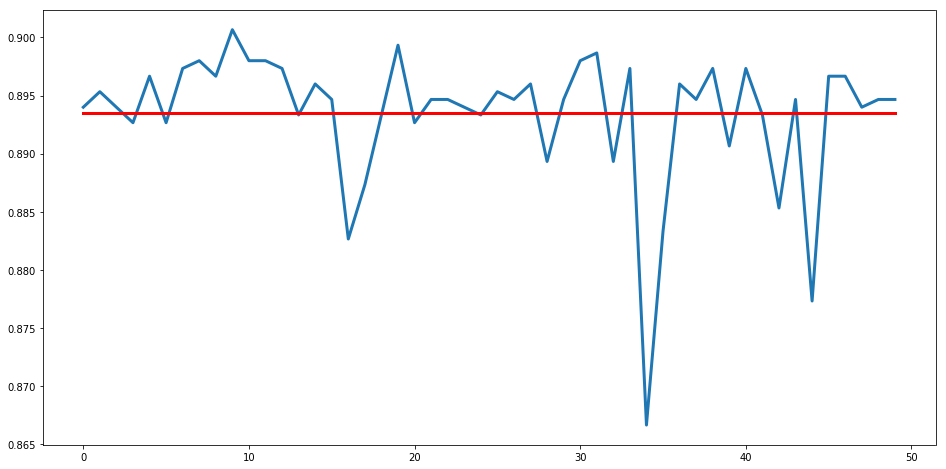

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"]=(16,8) 
plt.plot(perf, linewidth=3)
plt.plot(avg_perf, 'r', linewidth=3)

In [ ]:
import pickle
pickle.dump(ctree_final, open('Bank_Cust_Pred_Ctree_16_jul.pk', 'wb'))